# Demonstrate image compression using SVD

In [7]:
#using Pkg
#Pkg.add("Images")
#Pkg.add("ImageMagick")

    Updating registry at `C:\Users\llinp\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
   Installed MappedArrays ────────────── v0.4.1
   Installed ImageIO ─────────────────── v0.6.6
   Installed ComputationalResources ──── v0.3.2
   Installed Images ──────────────────── v0.25.2
   Installed QOI ─────────────────────── v1.0.0
   Installed ImageMagick ─────────────── v1.2.2
   Installed LazyModules ─────────────── v0.3.1
   Installed RegionTrees ─────────────── v0.3.2
   Installed MosaicViews ─────────────── v0.3.3
   Installed Netpbm ──────────────────── v1.0.2
   Installed ImageSegmentation ───────── v1.7.0
   Installed ImageQualityIndexes ─────── v0.3.3
   Installed CoordinateTransformations ─ v0.6.2
   Installed ImageDistances ──────────── v0.2.16
   Installed IndirectArrays ──────────── v1.0.0
   Installed ImageTransformations ────── v0.9.5
   Installed CustomUnitRanges ────────── v1.0.2
   Install

  [075b6546] + libsixel_jll v1.10.3+0
Precompiling project...
  ✓ IndirectArrays
  ✓ IterTools
  ✓ ProgressMeter
  ✓ MappedArrays
  ✓ Quaternions
  ✓ CustomUnitRanges
  ✓ WoodburyMatrices
  ✓ RangeArrays
  ✓ PkgVersion
  ✓ LazyModules
  ✓ Ratios
  ✓ TensorCore
  ✓ ComputationalResources
  ✓ TiledIteration
  ✓ PaddedViews
  ✓ StackViews
  ✓ libpng_jll
  ✓ CoordinateTransformations
  ✓ JpegTurbo_jll
  ✓ FileIO
  ✓ Imath_jll
  ✓ LERC_jll
  ✓ Graphics
  ✓ NearestNeighbors
  ✓ IntegralArrays
  ✓ FFTViews
  ✓ CatIndices
  ✓ RegionTrees
  ✓ AxisAlgorithms
  ✓ Graphs
  ✓ MosaicViews
  ✓ AxisArrays
  ✓ Rotations
  ✓ libsixel_jll
  ✓ QOI
  ✓ ColorVectorSpace
  ✓ OpenEXR_jll
  ✓ Libtiff_jll
  ✓ Clustering
  ✓ SimpleWeightedGraphs
  ✓ Interpolations
  ✓ OpenEXR
  ✓ ImageMagick_jll
  ✓ JLD2
  ✓ MetaGraphs
  ✓ ImageCore
  ✓ ImageMorphology
  ✓ ImageBase
  ✓ PNGFiles
  ✓ ImageMagick
  ✓ Sixel
  ✓ JpegTurbo
  ✓ Netpbm
  ✓ ImageDistances
  ✓ ImageShow
  ✓ ImageAxes
  ✓ ImageTransformations
  ✓ ImageMet

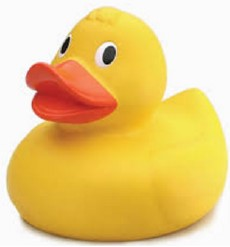

In [8]:
using Images
using LinearAlgebra

img = load("./duck.jpg");
display(img)

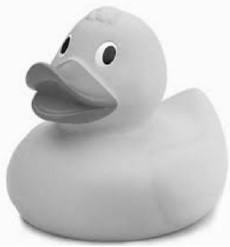

size of A = 247 x 230
storage   = 56810


In [9]:
display(Gray.(img))
# convert to a matrix
A=float64.(channelview(Gray.(img[:,:])))
println("size of A = ", size(A,1)," x ", size(A,2))
println("storage   = ", size(A,1) * size(A,2))

In [11]:
A

247×230 Matrix{Float64}:
 0.984314  0.984314  0.984314  0.984314  …  0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314  …  0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314  …  0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 0.984314  0.984314  0.984314  0.984314     0.984314  0.984314  0.984314
 ⋮                        

In [3]:
U, S, V = svd(A)
# check the accuracy of SVD
print("||USV'-A||=", norm(U*diagm(S)*V' - A))

||USV'-A||=3.866466999562912e-13

Compression rank = 1
Storage          = 477


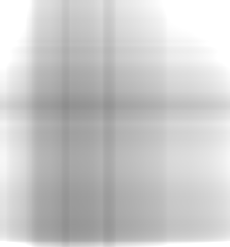

Compression rank = 5
Storage          = 2385


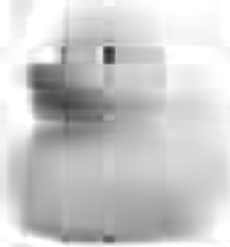

Compression rank = 10
Storage          = 4770


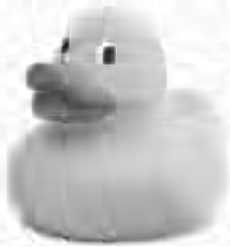

Compression rank = 20
Storage          = 9540


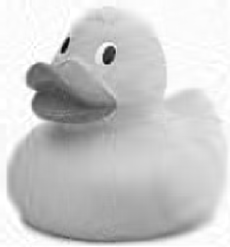

Compression rank = 30
Storage          = 14310

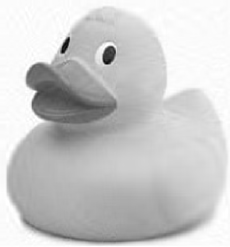


Compression rank = 40
Storage          = 19080


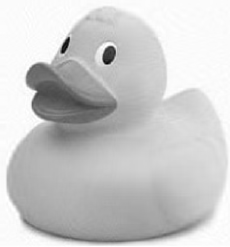

In [4]:
rank_list = [1,5,10,20,30,40]

for rank in rank_list
    
    Acompress = U[:,1:rank] * diagm(S[1:rank]) * V[:,1:rank]'

    println("Compression rank = ", rank)
    println("Storage          = ", (size(A,1)+size(A,2))*rank)

    flush(stdout)
    display(Gray.(Acompress))
end

Show the decay of the singular values


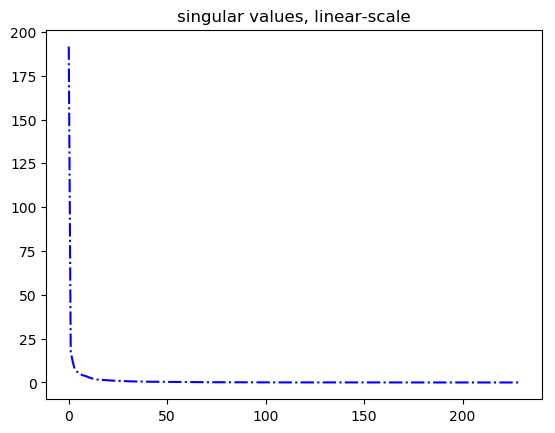

PyObject Text(0.5, 1.0, 'singular values, linear-scale')

In [10]:
using PyPlot
plot(S, "b-.")
title("singular values, linear-scale")

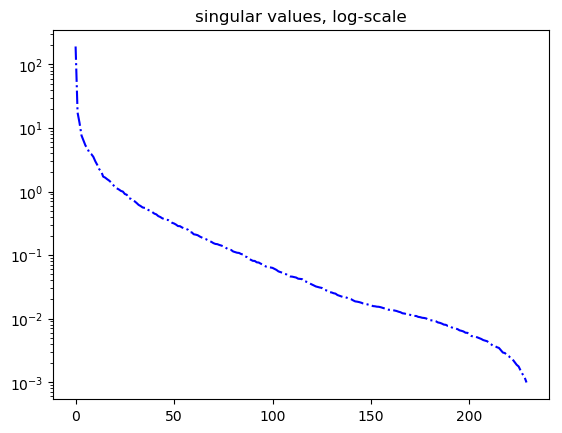

PyObject Text(0.5, 1.0, 'singular values, log-scale')

In [9]:
semilogy(S, "b-.")
title("singular values, log-scale")